# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('kc_house_data_train.csv')

Check how many rows and columns the DataFrame has. df.info() used to check the dtypes are numeric. df.columns to see the names of all the columns

In [49]:
df.shape

(17290, 22)

In [50]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [52]:
df.drop(columns=['Unnamed: 0', 'date'], inplace = True)

In [53]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

 A correlation heat map is used to determine the correlation between all the columns in the DataFrame.

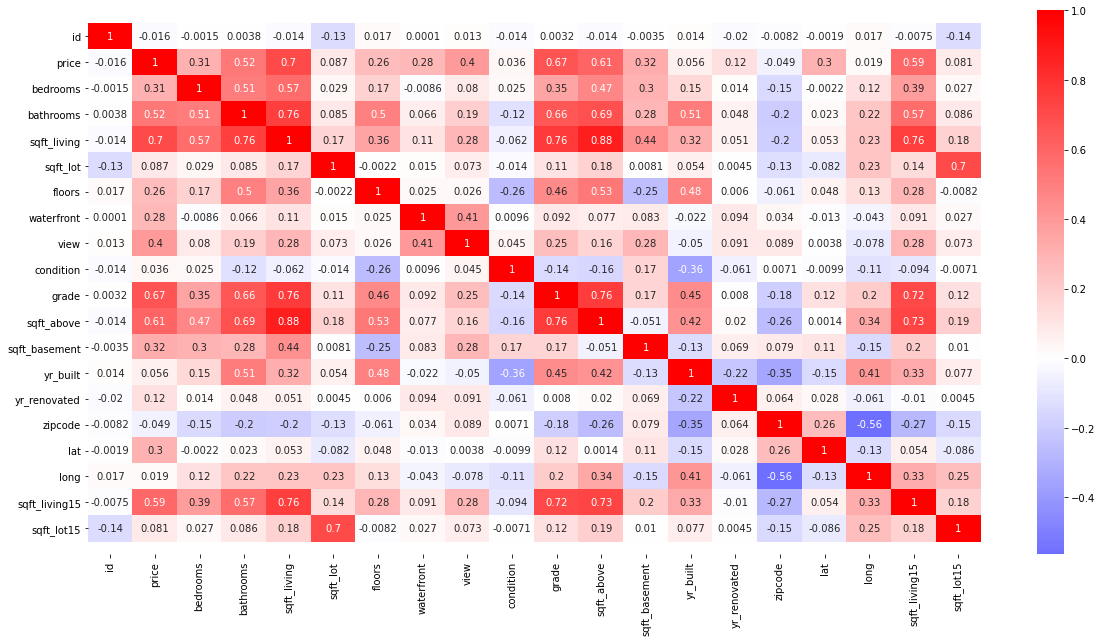

In [8]:
fig, ax = plt.subplots(figsize=(20,10)) # figsize to make larger
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)
# OPTIONAL: fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

<ipython-input-9-934ba6fb2b21>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_yticklabels(df['bathrooms'], fontsize = 17)
<ipython-input-9-934ba6fb2b21>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][1].set_yticklabels(df['bedrooms'], fontsize = 17)
<ipython-input-9-934ba6fb2b21>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_yticklabels(df['condition'], fontsize = 17)
<ipython-input-9-934ba6fb2b21>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][1].set_yticklabels(df['floors'], fontsize = 17)
<ipython-input-9-934ba6fb2b21>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_yticklabels(df['grade'], fontsize = 17)
<ipython-input-9-934ba6fb2b21>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][1].set_yticklabels(df['sqft_above

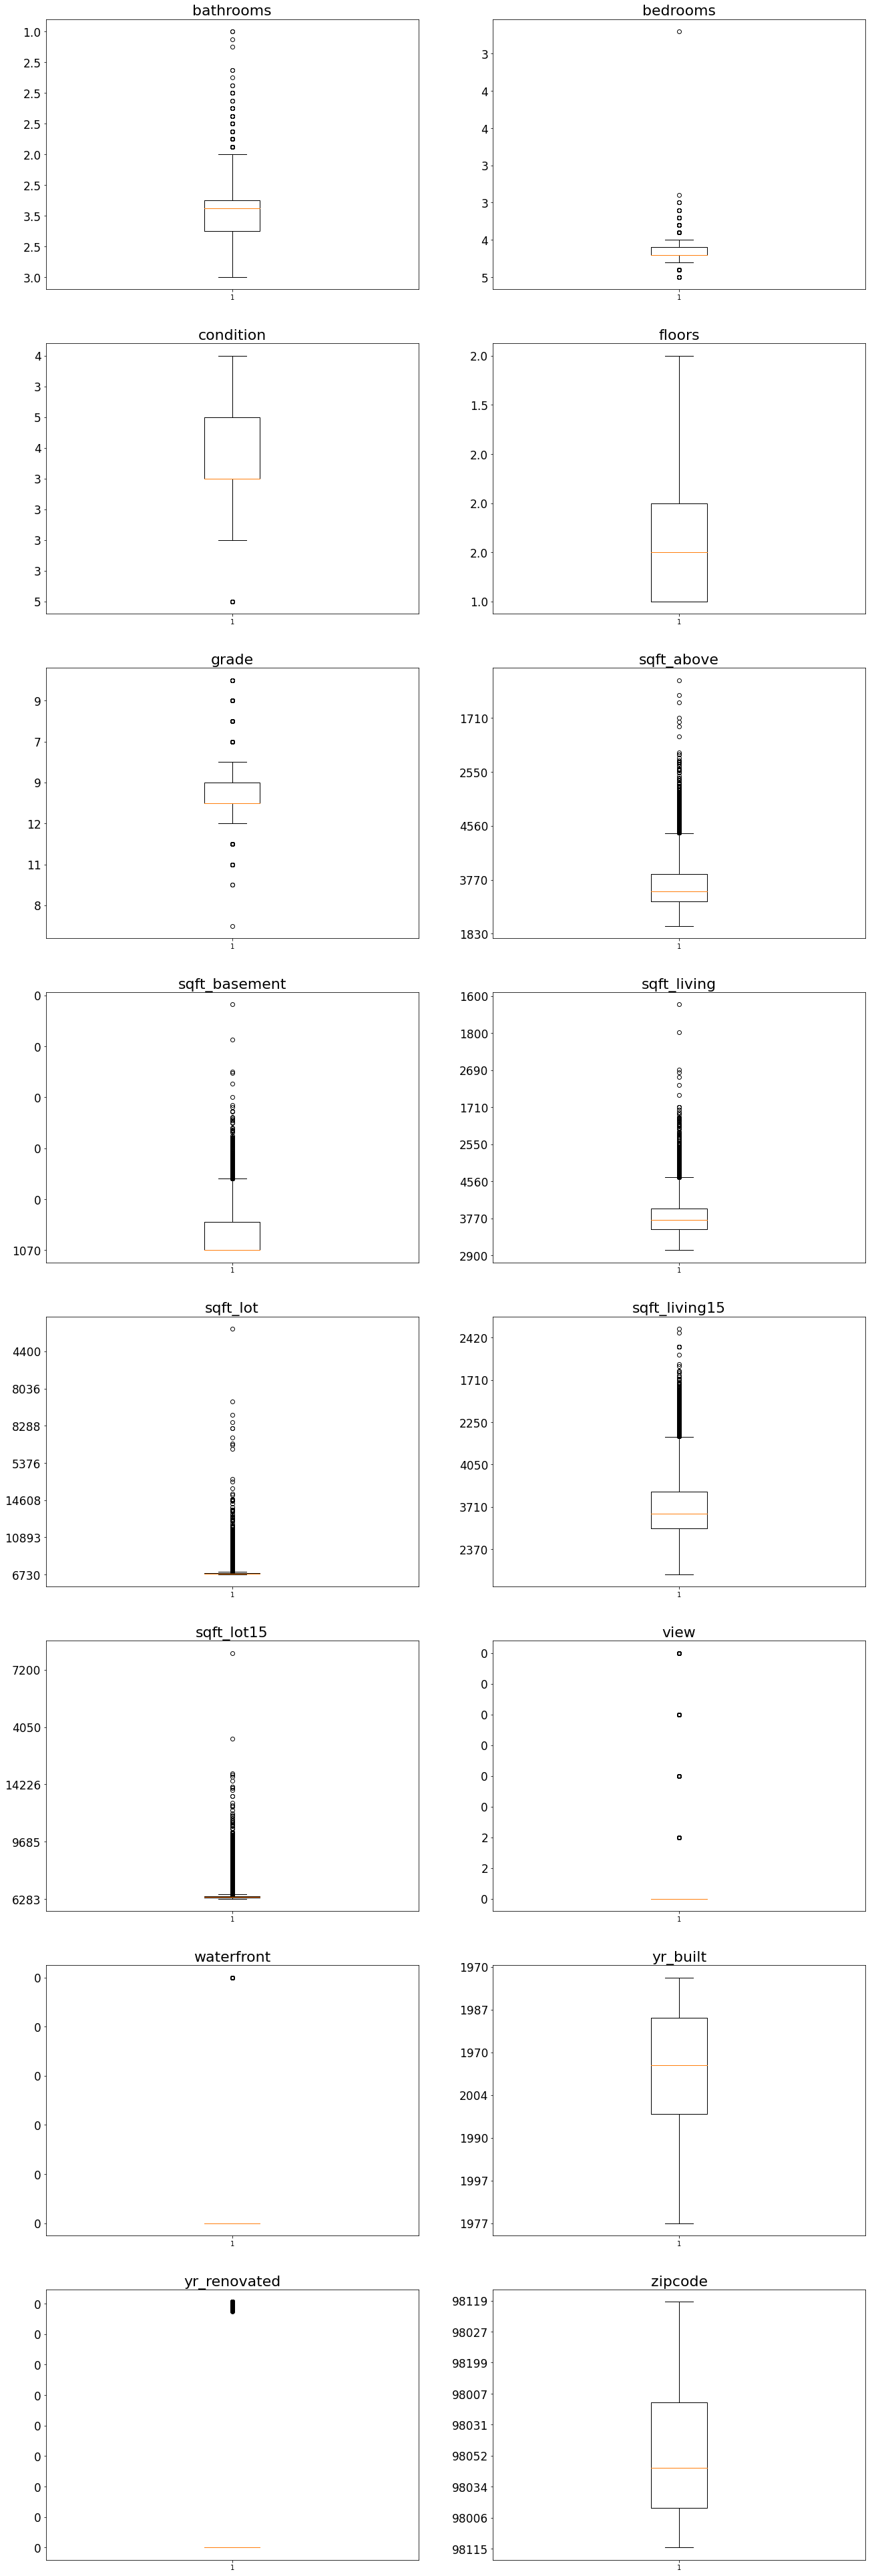

In [9]:
#boxplots of all the columns to see outliers

fig , axes = plt.subplots(8,2, figsize = (22,70))

axes[0][0].set_title('bathrooms', fontsize = 22)
axes[0][1].set_title('bedrooms', fontsize = 22)
axes[1][0].set_title('condition', fontsize = 22)
axes[1][1].set_title('floors', fontsize = 22)
axes[2][0].set_title('grade', fontsize = 22)
axes[2][1].set_title('sqft_above', fontsize = 22)
axes[3][0].set_title('sqft_basement', fontsize = 22)
axes[3][1].set_title('sqft_living', fontsize = 22)
axes[4][0].set_title('sqft_lot', fontsize = 22)
axes[4][1].set_title('sqft_living15', fontsize = 22)
axes[5][0].set_title('sqft_lot15', fontsize = 22)
axes[5][1].set_title('view', fontsize = 22)
axes[6][0].set_title('waterfront', fontsize = 22)
axes[6][1].set_title('yr_built', fontsize = 22)
axes[7][0].set_title('yr_renovated', fontsize = 22)
axes[7][1].set_title('zipcode', fontsize = 22)

axes[0][0].boxplot(df['bathrooms'])
axes[0][1].boxplot(df['bedrooms'])
axes[1][0].boxplot(df['condition'])
axes[1][1].boxplot(df['floors'])
axes[2][0].boxplot(df['grade'])
axes[2][1].boxplot(df['sqft_above'])
axes[3][0].boxplot(df['sqft_basement'])
axes[3][1].boxplot(df['sqft_living'])
axes[4][0].boxplot(df['sqft_lot'])
axes[4][1].boxplot(df['sqft_living15'])
axes[5][0].boxplot(df['sqft_lot15'])
axes[5][1].boxplot(df['view'])
axes[6][0].boxplot(df['waterfront'])
axes[6][1].boxplot(df['yr_built'])
axes[7][0].boxplot(df['yr_renovated'])
axes[7][1].boxplot(df['zipcode'])

# axes[0][0].set_ytick()
axes[0][0].set_yticklabels(df['bathrooms'], fontsize = 17)
axes[0][1].set_yticklabels(df['bedrooms'], fontsize = 17)
axes[1][0].set_yticklabels(df['condition'], fontsize = 17)
axes[1][1].set_yticklabels(df['floors'], fontsize = 17)
axes[2][0].set_yticklabels(df['grade'], fontsize = 17)
axes[2][1].set_yticklabels(df['sqft_above'], fontsize = 17)
axes[3][0].set_yticklabels(df['sqft_basement'], fontsize = 17)
axes[3][1].set_yticklabels(df['sqft_living'], fontsize = 17)
axes[4][0].set_yticklabels(df['sqft_lot'], fontsize = 17)
axes[4][1].set_yticklabels(df['sqft_living15'], fontsize = 17)
axes[5][0].set_yticklabels(df['sqft_lot15'], fontsize = 17)
axes[5][1].set_yticklabels(df['view'], fontsize = 17)
axes[6][0].set_yticklabels(df['waterfront'], fontsize = 17)
axes[6][1].set_yticklabels(df['yr_built'], fontsize = 17)
axes[7][0].set_yticklabels(df['yr_renovated'], fontsize = 17)
axes[7][1].set_yticklabels(df['zipcode'], fontsize = 17)
                      
plt.subplots_adjust(hspace = .2)

Text(0, 0.5, 'zipcode')

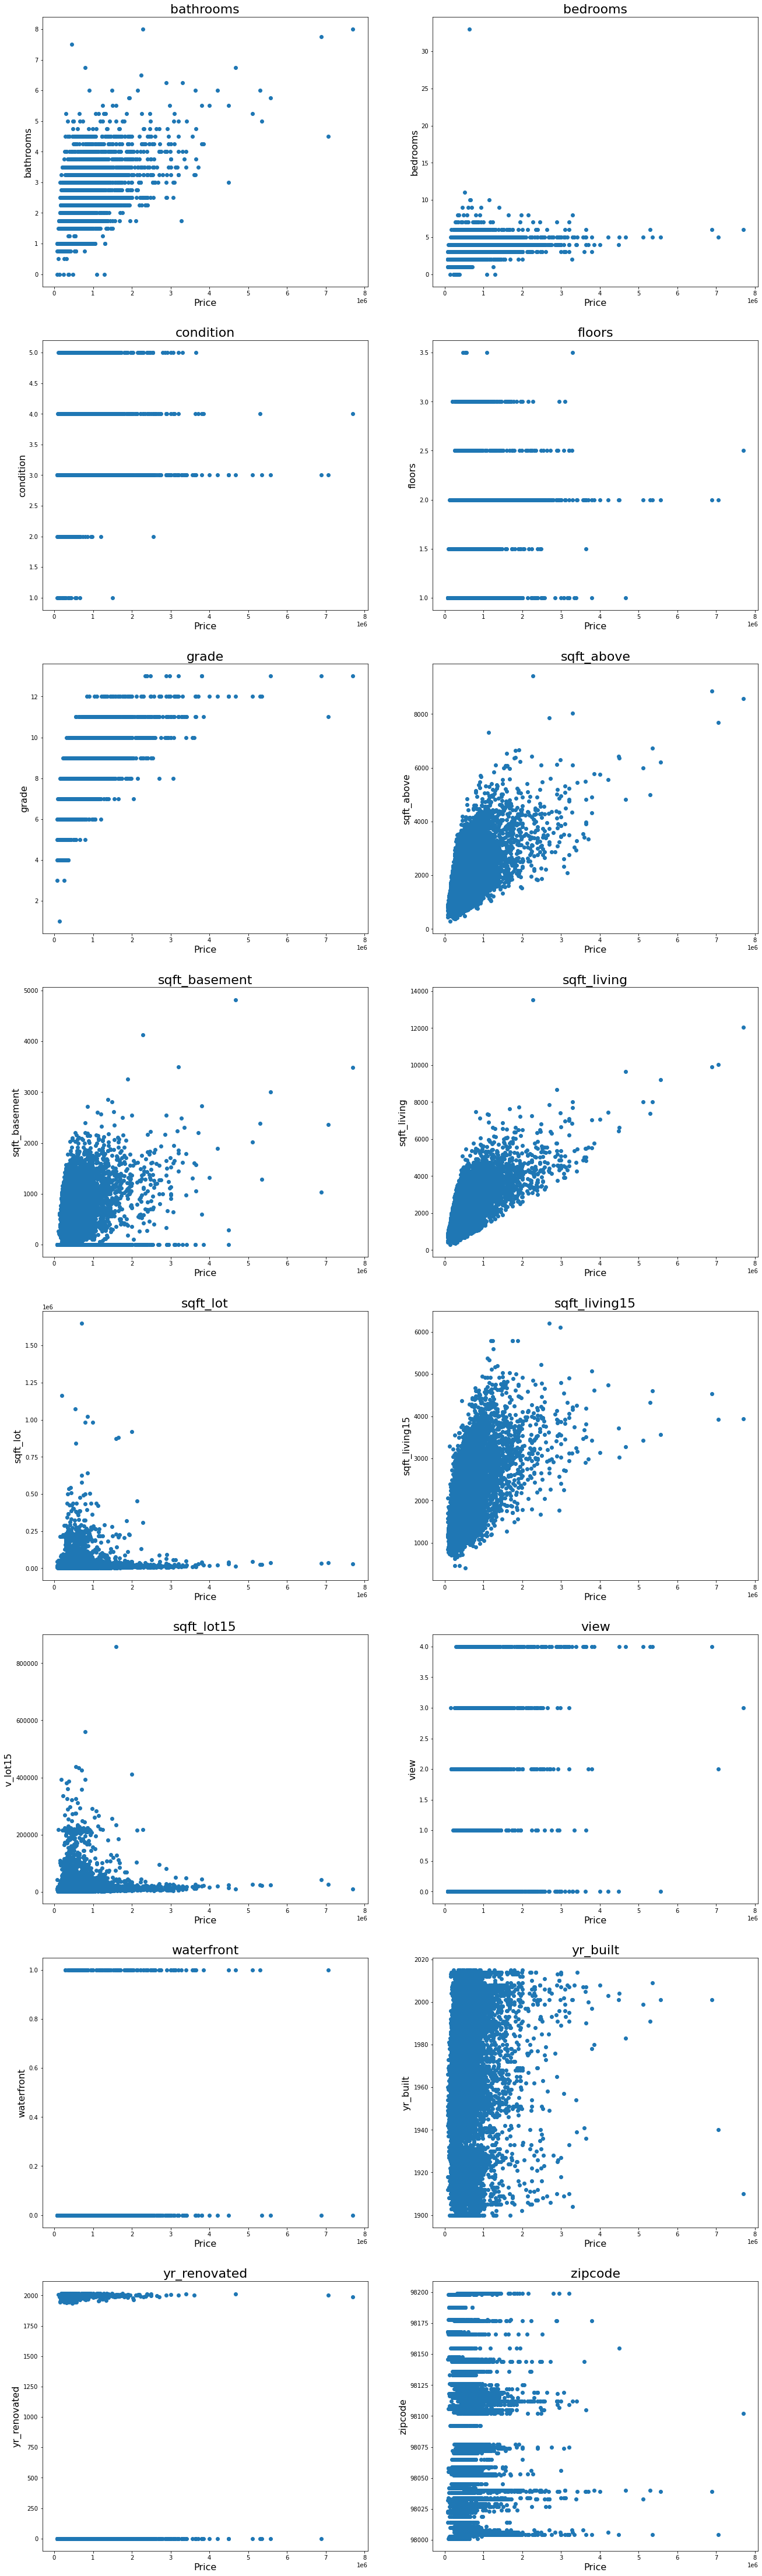

In [10]:
#scatter plot to see all the columns correlation with the price column

fig , axes = plt.subplots(8,2, figsize = (22,80))

axes[0][0].scatter(df['price'], df['bathrooms'])
axes[0][1].scatter(df['price'], df['bedrooms'])
axes[1][0].scatter(df['price'], df['condition'])
axes[1][1].scatter(df['price'], df['floors'])
axes[2][0].scatter(df['price'], df['grade'])
axes[2][1].scatter(df['price'], df['sqft_above'])
axes[3][0].scatter(df['price'], df['sqft_basement'])
axes[3][1].scatter(df['price'], df['sqft_living'])
axes[4][0].scatter(df['price'], df['sqft_lot'])
axes[4][1].scatter(df['price'], df['sqft_living15'])
axes[5][0].scatter(df['price'], df['sqft_lot15'])
axes[5][1].scatter(df['price'], df['view'])
axes[6][0].scatter(df['price'], df['waterfront'])
axes[6][1].scatter(df['price'], df['yr_built'])
axes[7][0].scatter(df['price'], df['yr_renovated'])
axes[7][1].scatter(df['price'], df['zipcode'])
                      
plt.subplots_adjust(hspace = .2)

axes[0][0].set_title('bathrooms', fontsize = 22)
axes[0][1].set_title('bedrooms', fontsize = 22)
axes[1][0].set_title('condition', fontsize = 22)
axes[1][1].set_title('floors', fontsize = 22)
axes[2][0].set_title('grade', fontsize = 22)
axes[2][1].set_title('sqft_above', fontsize = 22)
axes[3][0].set_title('sqft_basement', fontsize = 22)
axes[3][1].set_title('sqft_living', fontsize = 22)
axes[4][0].set_title('sqft_lot', fontsize = 22)
axes[4][1].set_title('sqft_living15', fontsize = 22)
axes[5][0].set_title('sqft_lot15', fontsize = 22)
axes[5][1].set_title('view', fontsize = 22)
axes[6][0].set_title('waterfront', fontsize = 22)
axes[6][1].set_title('yr_built', fontsize = 22)
axes[7][0].set_title('yr_renovated', fontsize = 22)
axes[7][1].set_title('zipcode', fontsize = 22)

axes[0][0].set_xlabel('Price', fontsize = 16)
axes[0][1].set_xlabel('Price', fontsize = 16)
axes[1][0].set_xlabel('Price', fontsize = 16)
axes[1][1].set_xlabel('Price', fontsize = 16)
axes[2][0].set_xlabel('Price', fontsize = 16)
axes[2][1].set_xlabel('Price', fontsize = 16)
axes[3][0].set_xlabel('Price', fontsize = 16)
axes[3][1].set_xlabel('Price', fontsize = 16)
axes[4][0].set_xlabel('Price', fontsize = 16)
axes[4][1].set_xlabel('Price', fontsize = 16)
axes[5][0].set_xlabel('Price', fontsize = 16)
axes[5][1].set_xlabel('Price', fontsize = 16)
axes[6][0].set_xlabel('Price', fontsize = 16)
axes[6][1].set_xlabel('Price', fontsize = 16)
axes[7][0].set_xlabel('Price', fontsize = 16)
axes[7][1].set_xlabel('Price', fontsize = 16)

axes[0][0].set_ylabel('bathrooms', fontsize = 16)
axes[0][1].set_ylabel('bedrooms', fontsize = 16)
axes[1][0].set_ylabel('condition', fontsize = 16)
axes[1][1].set_ylabel('floors', fontsize = 16)
axes[2][0].set_ylabel('grade', fontsize = 16)
axes[2][1].set_ylabel('sqft_above', fontsize = 16)
axes[3][0].set_ylabel('sqft_basement', fontsize = 16)
axes[3][1].set_ylabel('sqft_living', fontsize = 16)
axes[4][0].set_ylabel('sqft_lot', fontsize = 16)
axes[4][1].set_ylabel('sqft_living15', fontsize = 16)
axes[5][0].set_ylabel('v_lot15', fontsize = 16)
axes[5][1].set_ylabel('view', fontsize = 16)
axes[6][0].set_ylabel('waterfront', fontsize = 16)
axes[6][1].set_ylabel('yr_built', fontsize = 16)
axes[7][0].set_ylabel('yr_renovated', fontsize = 16)
axes[7][1].set_ylabel('zipcode', fontsize = 16)

In [11]:
# sns.pairplot(df[['bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'price']], corner=True)

In [12]:
# sns.pairplot(df[['sqft_lot', 'sqft_living', 'grade', 'view', 'condition']], corner=True)

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [54]:
above_5std = df.price.mean()+(5*df.price.std())
above_5std

2407334.4423872437

In [55]:
df[(df['price'])<= above_5std]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [56]:
df['bedrooms'] = df['bedrooms'].replace([0,33,11],[df['bedrooms'].median(),3, 4])
df['bedrooms']

0        4.0
1        5.0
2        4.0
3        3.0
4        3.0
        ... 
17285    5.0
17286    2.0
17287    3.0
17288    3.0
17289    3.0
Name: bedrooms, Length: 17290, dtype: float64

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [16]:
model = model = ols(formula='price~sqft_living+sqft_lot+view+waterfront+condition+grade+yr_renovated+yr_built+sqft_basement+sqft_above', data=df).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     3467.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:19:28   Log-Likelihood:            -2.3745e+05
No. Observations:               17290   AIC:                         4.749e+05
Df Residuals:                   17280   BIC:                         4.750e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       5.23e+06   1.44e+05     36.346      0.000    4.95e+06    5.51e+06
sqft_living     112.2744      2.009     55.883      0.000     108.336     116.212
sqft_lot         -0.2344      0.041     -5.737      0.000      -0.315      -0.154
view           4.863e+04   2563.691     18.970      0.000    4.36e+04    5.37e+04
waterfront     5.995e+05   2.09e+04     28.641      0.000    5.58e+05     6.4e+05
condition       1.76e+04   2850.706      6.173      0.000     1.2e+04    2.32e+04
grade          1.341e+05   2449.689     54.730      0.000    1.29e+05    1.39e+05
yr_renovated     16.7044      4.460      3.746      0.000       7.963      25.446
yr_built      -3118.9799     73.509    -42.430      0.000   -3263.064   -2974.896
sqft_basement    51.9120      2.776     18.702      0.000      46.471      57.353
sqft_above       60.3624      2.310     26.132      0.000      55.835      64.890
==============================================================================
Omnibus:                    13697.635   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1130339.229
Skew:                           3.230   Prob(JB):                         0.00
Kurtosis:                      42.080   Cond. No.                     2.84e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.32e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 4.1) Identify a categorical variable in the data set and create dummy columns.

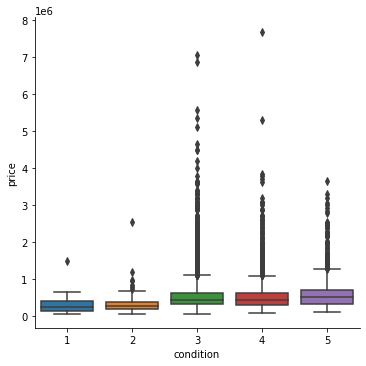

In [18]:
sns.catplot(x='condition', y='price', kind='box', data=df)

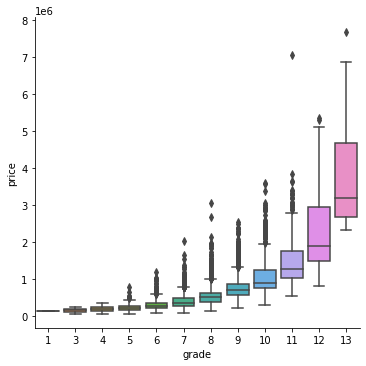

In [19]:
sns.catplot(x='grade', y='price', kind='box', data=df)

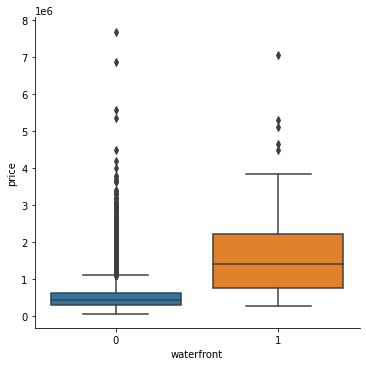

In [20]:
sns.catplot(x='waterfront', y='price', kind='box', data=df)

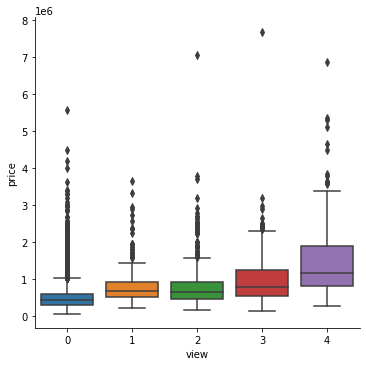

In [21]:
sns.catplot(x='view', y='price', kind='box', data=df)

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [22]:
now = pd.to_datetime('now')
now

Timestamp('2020-12-04 22:19:30.537221')

In [23]:
df['age'] = 2020 - df['yr_built']

In [24]:
df['age']

0        34
1        43
2        23
3        30
4        16
         ..
17285    62
17286    72
17287    67
17288    49
17289    68
Name: age, Length: 17290, dtype: int64

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [25]:
df['renovation_age'] = np.where(df['yr_renovated']>0, 2020 - df['yr_renovated'], 0)

In [26]:
df[df['renovation_age'] != 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovation_age
11,3971700580,385000.0,3.0,1.75,1930,14389,1.0,0,0,3,7,1130,800,1963,1998,98155,47.7733,-122.317,1730,14378,57,22
33,16000200,250000.0,3.0,2.25,1640,4420,2.0,0,0,4,7,1640,0,1918,1983,98002,47.3110,-122.210,1230,6632,102,37
67,7204200025,1225000.0,4.0,2.50,3120,49456,2.0,1,4,4,9,2590,530,1974,1989,98198,47.3535,-122.323,2030,32181,46,31
186,3603000410,174950.0,2.0,1.00,730,6000,1.0,0,0,3,6,730,0,1950,1985,98198,47.3832,-122.300,1750,7200,70,35
227,5315100737,900000.0,6.0,2.75,2300,24773,1.5,0,0,4,9,2300,0,1950,1985,98040,47.5833,-122.242,2720,11740,70,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17229,868000905,950000.0,3.0,2.50,3480,7800,1.0,0,0,4,7,1750,1730,1941,1998,98177,47.7047,-122.378,3010,9918,79,22
17235,1423069102,430000.0,3.0,2.50,2000,35438,2.0,0,0,3,7,2000,0,1968,2005,98027,47.4733,-121.994,2000,51836,52,15
17239,723049301,335000.0,2.0,1.75,1660,11437,2.0,0,0,3,7,1660,0,1958,1992,98146,47.4899,-122.339,1290,7860,62,28
17248,3586500770,808000.0,3.0,1.75,2590,32380,1.0,0,0,3,8,2590,0,1951,1994,98177,47.7539,-122.370,2340,28456,69,26


726 houses were renovated. 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature 

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [27]:
df_dummy = pd.get_dummies(df, columns=['condition', 'view', 'grade'], drop_first=True)

In [28]:
target = df['price']

In [29]:
df_dummy.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'age', 'renovation_age', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'view_1', 'view_2', 'view_3', 'view_4', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [30]:
features = ['sqft_living', 'sqft_lot', 'view_3', 'view_1', 'view_2', 'view_4', 'waterfront', 'condition_2', 'condition_3',
            'condition_4', 'condition_5', 'grade_4', 'grade_3', 'grade_5','grade_6', 'grade_7', 'grade_8', 'grade_9',
           'grade_10', 'grade_11', 'grade_12', 'grade_13', 'yr_renovated', 'age', 'sqft_basement', 'sqft_above']

In [31]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_dummy[features])
poly_data

array([[2.07000e+03, 8.89300e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.28490e+06],
       [2.90000e+03, 6.73000e+03, 0.00000e+00, ..., 1.14490e+06,
        1.95810e+06, 3.34890e+06],
       [3.77000e+03, 1.08930e+04, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.42129e+07],
       ...,
       [1.05000e+03, 9.87600e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.10250e+06],
       [1.90000e+03, 4.31860e+04, 0.00000e+00, ..., 3.60000e+05,
        7.80000e+05, 1.69000e+06],
       [1.33000e+03, 6.76800e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.76890e+06]])

In [32]:
poly_columns = poly.get_feature_names(features)

In [33]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [34]:
df_poly.head()

,sqft_living,sqft_lot,view_3,view_1,view_2,view_4,waterfront,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,yr_renovated,age,sqft_basement,sqft_above,sqft_living^2,sqft_living sqft_lot,sqft_living view_3,sqft_living view_1,sqft_living view_2,sqft_living view_4,sqft_living waterfront,sqft_living condition_2,sqft_living condition_3,sqft_living condition_4,sqft_living condition_5,sqft_living grade_4,sqft_living grade_5,sqft_living grade_6,sqft_living grade_7,sqft_living grade_8,sqft_living grade_9,sqft_living grade_10,sqft_living grade_11,sqft_living grade_12,sqft_living grade_13,sqft_living yr_renovated,sqft_living age,sqft_living sqft_basement,sqft_living sqft_above,...,grade_8 grade_13,grade_8 yr_renovated,grade_8 age,grade_8 sqft_basement,grade_8 sqft_above,grade_9^2,grade_9 grade_10,grade_9 grade_11,grade_9 grade_12,grade_9 grade_13,grade_9 yr_renovated,grade_9 age,grade_9 sqft_basement,grade_9 sqft_above,grade_10^2,grade_10 grade_11,grade_10 grade_12,grade_10 grade_13,grade_10 yr_renovated,grade_10 age,grade_10 sqft_basement,grade_10 sqft_above,grade_11^2,grade_11 grade_12,grade_11 grade_13,grade_11 yr_renovated,grade_11 age,grade_11 sqft_basement,grade_11 sqft_above,grade_12^2,grade_12 grade_13,grade_12 yr_renovated,grade_12 age,grade_12 sqft_basement,grade_12 sqft_above,grade_13^2,grade_13 yr_renovated,grade_13 age,grade_13 sqft_basement,grade_13 sqft_above,yr_renovated^2,yr_renovated age,yr_renovated sqft_basement,yr_renovated sqft_above,age^2,age sqft_basement,age sqft_above,sqft_basement^2,sqft_basement sqft_above,sqft_above^2
0,2070.0,8893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,2070.0,4284900.0,18408510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,70380.0,0.0,4284900.0,...,0.0,0.0,34.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1156.0,0.0,70380.0,0.0,0.0,4284900.0
1,2900.0,6730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1070.0,1830.0,8410000.0,19517000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,124700.0,3103000.0,5307000.0,...,0.0,0.0,43.0,1070.0,1830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1849.0,46010.0,78690.0,1144900.0,1958100.0,3348900.0
2,3770.0,10893.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,3770.0,14212900.0,41066610.0,0.0,0.0,3770.0,0.0,0.0,0.0,3770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3770.0,0.0,0.0,0.0,86710.0,0.0,14212900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,3770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0,0.0,86710.0,0.0,0.0,14212900.0
3,4560.0,14608.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,0.0,4560.0,20793600.0,66612480.0,0.0,0.0,4560.0,0.0,0.0,0.0,4560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4560.0,0.0,0.0,136800.0,0.0,20793600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,0.0,4560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,0.0,136800.0,0.0,0.0,20793600.0
4,2550.0,5376.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2550.0,6502500.0,13708800.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,40800.0,0.0,6502500.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,0.0,40800.0,0.0,0.0,6502500.0


In [254]:
#before
df.shape

(17290, 22)

In [255]:
#after feature
df_poly.shape

(17290, 350)

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [37]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 350) Target:  (13832,)
Test set - Features:  (3458, 350) Target:  (3458,)


### 5.2) Fit your scaler to training the data.

In [38]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [39]:
#your code here 

### 5.4) Fit the model to the training data.

In [40]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

993214.9563727055
[ 2.77693717e+02 -1.55371047e+01  3.26282812e+03  1.32208383e+05
  6.37472464e+04  2.44946968e+05 -2.40091704e+05 -3.90289788e+05
 -2.98710150e+05 -2.42158001e+05 -2.03273134e+05  1.32006826e+05
 -3.36905048e+04 -1.75543043e+03 -1.29770792e+05  1.33043652e+05
 -7.72862170e+04  6.39697543e+03  1.86042182e+05  2.26363924e+05
 -4.41351555e+05 -8.57534288e+02 -1.16881710e+04  4.97292593e+02
 -2.18519814e+02  6.65129134e-02 -3.63901230e-01 -1.99783003e+01
  7.56302555e+00 -1.68204473e+01 -4.52920516e+01  2.58161979e+02
 -1.22903355e+02 -2.09660309e+02 -1.93373849e+02 -1.74285154e+02
  1.29645958e+02 -8.36346963e+01 -5.61214316e+01 -3.32463374e+01
 -2.47668902e+01  1.77483324e+01  2.79094641e+01  3.50158262e+01
  1.54354055e+02  1.14623856e+02  2.05182650e-02  2.50733716e-01
 -6.42779090e-02 -5.56918965e-02  8.72454166e-07 -1.93498887e-01
  2.20313633e-01 -2.56181311e-01 -1.08556757e+00 -3.80021465e+00
  4.09103854e-01  6.60270312e-01  2.75554714e-01  4.05971472e-01
  1.335

### 5.5) Use the model to predict on the training set and the test set.

In [41]:
y_pred = lm.predict(X_test)

print ("Score:", lm.score(X_test, y_test))

Score: 0.7049648786639098


In [156]:
y_pred = lm.predict(X_train)

print ("Score:", lm.score(X_train, y_train))

Score: 0.6471036756426587


### 5.6) Evaluate the training and test predictions using RMSE.

y_test

In [42]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:129818.96803351061
Mean Squared Error:42165917894.00345
Root Mean Squared Error:205343.41453770426


In [43]:
price_std = target.std()
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.34774274929294696
Root Mean Squared Error Z: 0.5500481524557346


### 5.7) Determine if your model is overfit.

y_train

In [44]:
y_train_prediction = lm.predict(X_train)

In [45]:
test_mae = metrics.mean_absolute_error(y_train, y_train_prediction)
test_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_prediction)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_prediction)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))))

Mean Absolute Error:125315.76917569709
Mean Squared Error:34695261121.29485
Root Mean Squared Error:186266.6398507657


These are not overfitting because the RMSE of the train and test are fairly similar. 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [46]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=30, score_func=<function f_regression at 0x000001D8FFFD1F70>)

In [47]:
selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [48]:
selected_columns

Index(['sqft_living', 'grade_10', 'grade_11', 'grade_12', 'sqft_basement',
       'sqft_above', 'sqft_living^2', 'sqft_living view_4',
       'sqft_living waterfront', 'sqft_living condition_3',
       'sqft_living grade_10', 'sqft_living grade_11', 'sqft_living grade_12',
       'sqft_living age', 'sqft_living sqft_basement',
       'sqft_living sqft_above', 'view_4 sqft_above', 'waterfront sqft_above',
       'grade_10^2', 'grade_10 age', 'grade_10 sqft_above', 'grade_11^2',
       'grade_11 age', 'grade_11 sqft_above', 'grade_12^2',
       'grade_12 sqft_above', 'age sqft_above', 'sqft_basement^2',
       'sqft_basement sqft_above', 'sqft_above^2'],
      dtype='object')

In [49]:
removed_columns

Index(['sqft_lot', 'view_3', 'view_1', 'view_2', 'view_4', 'waterfront',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       ...
       'grade_13 yr_renovated', 'grade_13 age', 'grade_13 sqft_basement',
       'grade_13 sqft_above', 'yr_renovated^2', 'yr_renovated age',
       'yr_renovated sqft_basement', 'yr_renovated sqft_above', 'age^2',
       'age sqft_basement'],
      dtype='object', length=347)

# Model 2 based off model 1

In [50]:
#only want to use the previous selected columns
df_poly[selected_columns]

,sqft_living,grade_10,grade_11,grade_12,sqft_basement,sqft_above,sqft_living^2,sqft_living view_4,sqft_living waterfront,sqft_living condition_3,sqft_living grade_10,sqft_living grade_11,sqft_living grade_12,sqft_living age,sqft_living sqft_basement,sqft_living sqft_above,view_4 sqft_above,waterfront sqft_above,grade_10^2,grade_10 age,grade_10 sqft_above,grade_11^2,grade_11 age,grade_11 sqft_above,grade_12^2,grade_12 sqft_above,age sqft_above,sqft_basement^2,sqft_basement sqft_above,sqft_above^2
0,2070.0,0.0,0.0,0.0,0.0,2070.0,4284900.0,0.0,0.0,0.0,0.0,0.0,0.0,70380.0,0.0,4284900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70380.0,0.0,0.0,4284900.0
1,2900.0,0.0,0.0,0.0,1070.0,1830.0,8410000.0,0.0,0.0,0.0,0.0,0.0,0.0,124700.0,3103000.0,5307000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78690.0,1144900.0,1958100.0,3348900.0
2,3770.0,0.0,1.0,0.0,0.0,3770.0,14212900.0,0.0,0.0,3770.0,0.0,3770.0,0.0,86710.0,0.0,14212900.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,3770.0,0.0,0.0,86710.0,0.0,0.0,14212900.0
3,4560.0,0.0,0.0,1.0,0.0,4560.0,20793600.0,0.0,0.0,4560.0,0.0,0.0,4560.0,136800.0,0.0,20793600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4560.0,136800.0,0.0,0.0,20793600.0
4,2550.0,0.0,0.0,0.0,0.0,2550.0,6502500.0,0.0,0.0,2550.0,0.0,0.0,0.0,40800.0,0.0,6502500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40800.0,0.0,0.0,6502500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,3240.0,0.0,0.0,0.0,1220.0,2020.0,10497600.0,0.0,0.0,3240.0,0.0,0.0,0.0,200880.0,3952800.0,6544800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125240.0,1488400.0,2464400.0,4080400.0
17286,1300.0,0.0,0.0,0.0,0.0,1300.0,1690000.0,0.0,0.0,1300.0,0.0,0.0,0.0,93600.0,0.0,1690000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93600.0,0.0,0.0,1690000.0
17287,1050.0,0.0,0.0,0.0,0.0,1050.0,1102500.0,0.0,0.0,1050.0,0.0,0.0,0.0,70350.0,0.0,1102500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70350.0,0.0,0.0,1102500.0
17288,1900.0,0.0,0.0,0.0,600.0,1300.0,3610000.0,0.0,0.0,0.0,0.0,0.0,0.0,93100.0,1140000.0,2470000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63700.0,360000.0,780000.0,1690000.0


In [51]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly[selected_columns], target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 30) Target:  (13832,)
Test set - Features:  (3458, 30) Target:  (3458,)


In [52]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

210951.03225090267
[ 1.82337427e+01  2.60385564e+05  5.25954848e+05  5.81608216e+05
  1.07706856e+01  7.46304699e+00  1.89433967e-02  2.95636785e+01
  2.17016459e+02 -1.23956358e+01 -3.52905044e+01 -1.40120237e+01
  6.34156557e+01  1.52542545e+00 -2.55330807e-02  4.51471816e-02
  4.85014180e+01 -5.69776459e+01  2.60385564e+05  2.43084709e+03
 -8.66140233e+01  5.25954847e+05  9.51079622e+02 -1.92975728e+02
  5.81608216e+05 -2.15880117e+02 -7.39427333e-01 -8.16811692e-02
  5.34547003e-02 -2.54771175e-02]


In [53]:
y_pred = lm.predict(X_test)
y_pred

array([ 428596.47602556,  353872.16309502, 1170430.6129335 , ...,
        394400.8879862 ,  467382.23634184,  442438.1204584 ])

In [54]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.6061204294368496


This model did worse than the original 

In [55]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


# print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
# print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared Error:237260.61306632432


The RMSE shows the error is further off here :(

In [56]:
price_std = target.std()
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.40074128579953644
Root Mean Squared Error Z: 0.6355439358084887


# The same process with NO feature engineering - just plain features

In [57]:
features_orig = ['sqft_living', 'sqft_lot', 'view', 'waterfront', 'condition', 'grade', 'yr_renovated',
            'yr_built', 'sqft_basement', 'sqft_above']

In [58]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df[features_orig])
poly_data

array([[2.07000e+03, 8.89300e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.28490e+06],
       [2.90000e+03, 6.73000e+03, 0.00000e+00, ..., 1.14490e+06,
        1.95810e+06, 3.34890e+06],
       [3.77000e+03, 1.08930e+04, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.42129e+07],
       ...,
       [1.05000e+03, 9.87600e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.10250e+06],
       [1.90000e+03, 4.31860e+04, 0.00000e+00, ..., 3.60000e+05,
        7.80000e+05, 1.69000e+06],
       [1.33000e+03, 6.76800e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.76890e+06]])

In [59]:
target = df['price']

In [60]:
poly_columns_orig = poly.get_feature_names(features_orig)

In [61]:
df_poly_orig = pd.DataFrame(poly_data, columns=poly_columns_orig)

In [62]:
df_poly_orig.head()

,sqft_living,sqft_lot,view,waterfront,condition,grade,yr_renovated,yr_built,sqft_basement,sqft_above,sqft_living^2,sqft_living sqft_lot,sqft_living view,sqft_living waterfront,sqft_living condition,sqft_living grade,sqft_living yr_renovated,sqft_living yr_built,sqft_living sqft_basement,sqft_living sqft_above,sqft_lot^2,sqft_lot view,sqft_lot waterfront,sqft_lot condition,sqft_lot grade,sqft_lot yr_renovated,sqft_lot yr_built,sqft_lot sqft_basement,sqft_lot sqft_above,view^2,view waterfront,view condition,view grade,view yr_renovated,view yr_built,view sqft_basement,view sqft_above,waterfront^2,waterfront condition,waterfront grade,waterfront yr_renovated,waterfront yr_built,waterfront sqft_basement,waterfront sqft_above,condition^2,condition grade,condition yr_renovated,condition yr_built,condition sqft_basement,condition sqft_above,grade^2,grade yr_renovated,grade yr_built,grade sqft_basement,grade sqft_above,yr_renovated^2,yr_renovated yr_built,yr_renovated sqft_basement,yr_renovated sqft_above,yr_built^2,yr_built sqft_basement,yr_built sqft_above,sqft_basement^2,sqft_basement sqft_above,sqft_above^2
0,2070.0,8893.0,0.0,0.0,4.0,8.0,0.0,1986.0,0.0,2070.0,4284900.0,18408510.0,0.0,0.0,8280.0,16560.0,0.0,4111020.0,0.0,4284900.0,79085449.0,0.0,0.0,35572.0,71144.0,0.0,17661498.0,0.0,18408510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,32.0,0.0,7944.0,0.0,8280.0,64.0,0.0,15888.0,0.0,16560.0,0.0,0.0,0.0,0.0,3944196.0,0.0,4111020.0,0.0,0.0,4284900.0
1,2900.0,6730.0,0.0,0.0,5.0,8.0,0.0,1977.0,1070.0,1830.0,8410000.0,19517000.0,0.0,0.0,14500.0,23200.0,0.0,5733300.0,3103000.0,5307000.0,45292900.0,0.0,0.0,33650.0,53840.0,0.0,13305210.0,7201100.0,12315900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,40.0,0.0,9885.0,5350.0,9150.0,64.0,0.0,15816.0,8560.0,14640.0,0.0,0.0,0.0,0.0,3908529.0,2115390.0,3617910.0,1144900.0,1958100.0,3348900.0
2,3770.0,10893.0,2.0,0.0,3.0,11.0,0.0,1997.0,0.0,3770.0,14212900.0,41066610.0,7540.0,0.0,11310.0,41470.0,0.0,7528690.0,0.0,14212900.0,118657449.0,21786.0,0.0,32679.0,119823.0,0.0,21753321.0,0.0,41066610.0,4.0,0.0,6.0,22.0,0.0,3994.0,0.0,7540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,33.0,0.0,5991.0,0.0,11310.0,121.0,0.0,21967.0,0.0,41470.0,0.0,0.0,0.0,0.0,3988009.0,0.0,7528690.0,0.0,0.0,14212900.0
3,4560.0,14608.0,2.0,0.0,3.0,12.0,0.0,1990.0,0.0,4560.0,20793600.0,66612480.0,9120.0,0.0,13680.0,54720.0,0.0,9074400.0,0.0,20793600.0,213393664.0,29216.0,0.0,43824.0,175296.0,0.0,29069920.0,0.0,66612480.0,4.0,0.0,6.0,24.0,0.0,3980.0,0.0,9120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,36.0,0.0,5970.0,0.0,13680.0,144.0,0.0,23880.0,0.0,54720.0,0.0,0.0,0.0,0.0,3960100.0,0.0,9074400.0,0.0,0.0,20793600.0
4,2550.0,5376.0,0.0,0.0,3.0,9.0,0.0,2004.0,0.0,2550.0,6502500.0,13708800.0,0.0,0.0,7650.0,22950.0,0.0,5110200.0,0.0,6502500.0,28901376.0,0.0,0.0,16128.0,48384.0,0.0,10773504.0,0.0,13708800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,27.0,0.0,6012.0,0.0,7650.0,81.0,0.0,18036.0,0.0,22950.0,0.0,0.0,0.0,0.0,4016016.0,0.0,5110200.0,0.0,0.0,6502500.0


In [63]:
df_poly_orig.shape

(17290, 65)

In [64]:
###???????

# [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(df_poly_orig.values, i) for i in range(df_poly_orig.shape[1])]
# vif["features"] = df_poly_orig.columns
# vif.round(1)

In [65]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly_orig, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 65) Target:  (13832,)
Test set - Features:  (3458, 65) Target:  (3458,)


In [66]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

125743966.8849654
[-1.57104073e+07 -2.08922205e+01 -1.12094393e+05 -4.70729777e+06
  3.35377951e+05  9.11177157e+05 -3.30448303e+03 -1.30563340e+05
  1.57109382e+07  1.57109227e+07  2.98796965e-01  2.59189078e+01
 -9.30388199e+00  2.24794808e+02  1.75444274e+01  2.37492943e+01
 -4.66438315e+00  4.48602969e-02  5.56027498e-01 -1.31383439e+00
  8.06192475e-07 -1.13519636e-01 -2.33128829e+00 -1.67729837e-01
 -2.54182448e-02  3.01566906e-05  1.12792694e-02 -2.59193132e+01
 -2.59193353e+01  6.25026264e+03 -3.08682061e+03  1.03525510e+04
  1.05260983e+04  8.39413874e+00  1.91607542e+01 -1.07756360e+00
 -1.54080835e+00 -4.70729541e+06  6.54137297e+04 -1.12976589e+05
 -6.96386765e+01  4.93351553e+03  8.54965829e+01  1.36180466e+02
 -9.98289552e+02  8.51823407e+03 -8.97275595e+00 -2.11434842e+02
  7.97046677e+00  1.22237212e+01  1.04989704e+04 -6.17453602e+00
 -5.15996212e+02  2.21417920e+01 -8.75759105e+00  7.88503689e-01
  9.09351992e-01  4.70773794e+00  4.68931088e+00  3.40287804e+01
 -4.687

In [67]:
y_pred = lm.predict(X_test)
y_pred

array([ 400938.50672586,  321651.06026377, 1355113.32755603, ...,
        329094.71798046,  524112.18706748,  453485.8485233 ])

Scores for the test and train

In [68]:
print ("Score:", lm.score(X_train, y_train))

Score: 0.7307681717206492


In [69]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.7141922903724773


In [70]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:129538.01986092345
Mean Squared Error:40847151901.956
Root Mean Squared Error:202106.78341400618


In [71]:
price_std = target.std()
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.3469901806088463
Root Mean Squared Error Z: 0.5413782714479656


In [72]:
y_train_prediction = lm.predict(X_train)

In [73]:
test_mae = metrics.mean_absolute_error(y_train, y_train_prediction)
test_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_prediction)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_prediction)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))))

Mean Absolute Error:128210.17634841512
Mean Squared Error:37280017144.030594
Root Mean Squared Error:193080.33857446644


1 - Not overfitting
2 - This non feature, feautures seem to be a pretty good model. 

In [74]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x000001D8FFFD1F70>)

In [75]:
selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

# Another Model

According to the heat map I'm keeping sqft_living because is has a .7 correlation with price, grade because it has a .67 corr, bathrooms bc the correlation is .52 and everyone needs bathrooms, and view has .4 corr

In [224]:
features = ['sqft_lot', 'view_1', 'view_2', 'view_3', 'view_4','grade_3','grade_4', 'grade_5','grade_6', 'grade_7', 
            'grade_8', 'grade_9','grade_10', 'grade_11', 'grade_12', 'grade_13', 'age', 'bathrooms']

In [214]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [215]:
poly_data = poly.fit_transform(df_dummy[features])

In [216]:
poly_data

array([[8.8930e+03, 0.0000e+00, 0.0000e+00, ..., 1.1560e+03, 7.6500e+01,
        5.0625e+00],
       [6.7300e+03, 0.0000e+00, 0.0000e+00, ..., 1.8490e+03, 1.2900e+02,
        9.0000e+00],
       [1.0893e+04, 0.0000e+00, 1.0000e+00, ..., 5.2900e+02, 5.7500e+01,
        6.2500e+00],
       ...,
       [9.8760e+03, 0.0000e+00, 0.0000e+00, ..., 4.4890e+03, 6.7000e+01,
        1.0000e+00],
       [4.3186e+04, 0.0000e+00, 0.0000e+00, ..., 2.4010e+03, 7.3500e+01,
        2.2500e+00],
       [6.7680e+03, 0.0000e+00, 0.0000e+00, ..., 4.6240e+03, 1.0200e+02,
        2.2500e+00]])

In [217]:
poly_columns = poly.get_feature_names(features)

In [218]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [219]:
df_poly.head()

,sqft_lot,view_1,view_2,view_3,view_4,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,age,bathrooms,sqft_lot^2,sqft_lot view_1,sqft_lot view_2,sqft_lot view_3,sqft_lot view_4,sqft_lot grade_4,sqft_lot grade_5,sqft_lot grade_6,sqft_lot grade_7,sqft_lot grade_8,sqft_lot grade_9,sqft_lot grade_10,sqft_lot grade_11,sqft_lot grade_12,sqft_lot grade_13,sqft_lot age,sqft_lot bathrooms,view_1^2,view_1 view_2,view_1 view_3,view_1 view_4,view_1 grade_4,view_1 grade_5,view_1 grade_6,view_1 grade_7,view_1 grade_8,view_1 grade_9,view_1 grade_10,view_1 grade_11,view_1 grade_12,view_1 grade_13,view_1 age,view_1 bathrooms,...,grade_6 grade_11,grade_6 grade_12,grade_6 grade_13,grade_6 age,grade_6 bathrooms,grade_7^2,grade_7 grade_8,grade_7 grade_9,grade_7 grade_10,grade_7 grade_11,grade_7 grade_12,grade_7 grade_13,grade_7 age,grade_7 bathrooms,grade_8^2,grade_8 grade_9,grade_8 grade_10,grade_8 grade_11,grade_8 grade_12,grade_8 grade_13,grade_8 age,grade_8 bathrooms,grade_9^2,grade_9 grade_10,grade_9 grade_11,grade_9 grade_12,grade_9 grade_13,grade_9 age,grade_9 bathrooms,grade_10^2,grade_10 grade_11,grade_10 grade_12,grade_10 grade_13,grade_10 age,grade_10 bathrooms,grade_11^2,grade_11 grade_12,grade_11 grade_13,grade_11 age,grade_11 bathrooms,grade_12^2,grade_12 grade_13,grade_12 age,grade_12 bathrooms,grade_13^2,grade_13 age,grade_13 bathrooms,age^2,age bathrooms,bathrooms^2
0,8893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,2.25,79085449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8893.0,0.0,0.0,0.0,0.0,0.0,302362.0,20009.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1156.0,76.5,5.0625
1,6730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,43.0,3.00,45292900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6730.0,0.0,0.0,0.0,0.0,0.0,289390.0,20190.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,43.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1849.0,129.0,9.0000
2,10893.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,2.50,118657449.0,0.0,10893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10893.0,0.0,0.0,250539.0,27232.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0,57.5,6.2500
3,14608.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,3.50,213393664.0,0.0,14608.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14608.0,0.0,438240.0,51128.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,3.5,0.0,0.0,0.0,900.0,105.0,12.2500
4,5376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,2.50,28901376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5376.0,0.0,0.0,0.0,0.0,86016.0,13440.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,16.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,40.0,6.2500


In [220]:
df_poly.shape

(17290, 170)

In [121]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 189) Target:  (13832,)
Test set - Features:  (3458, 189) Target:  (3458,)


In [122]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

218493.40745215456
[-1.51152073e+01  1.04220513e+05  1.47488950e+05  1.86643488e+05
  1.90207176e+05 -5.83852867e-05  1.92899218e+05  6.54420464e+04
  1.74844717e+04 -5.19682422e+03  2.11052002e+04  1.29767525e+04
 -4.15959213e+04 -1.62013527e+04  3.22340819e+05 -5.69252667e+05
  2.88989043e+03  9.26680169e+04  4.56304406e-07  2.45620417e-01
 -3.18685030e-01 -2.90404298e-01 -3.11327378e+00  2.69144039e-07
  1.43767965e+01  1.64396728e+01  1.62429835e+01  1.65458609e+01
  1.65517383e+01  1.63325558e+01  1.60567967e+01  1.66459795e+01
  1.57092308e+01  7.30534000e+01 -9.24460519e-03 -4.17028016e-01
  1.04220814e+05  1.51048880e-08  1.55414455e-08 -4.07453626e-10
 -2.52039172e-08 -1.73031258e+05 -5.60575422e+04 -1.35485656e+05
 -1.00187687e+05 -5.30430326e+04 -2.07293674e+05 -1.50893662e+05
  2.90564931e+05  6.89648395e+05 -4.99130692e-09 -9.24433348e+02
  3.17893347e+04  1.47488951e+05  5.52972779e-10  1.13213900e-08
 -4.24915925e-09 -1.42909603e+05 -2.70467688e+05 -1.67052252e+05
 -1.90

In [123]:
y_pred = lm.predict(X_test)

In [124]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.6229448417825687


In [125]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared Error:232138.06690557412


This test did not do well in comparison to my others. 

In [126]:
y_train_prediction = lm.predict(X_train)

In [127]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))

print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))))

Root Mean Squared Error:207116.56482686082


Still not overfitting because the train and test are similiar.

In [128]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=30, score_func=<function f_regression at 0x000001D8FFFD1F70>)

In [129]:
selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


# Another Model based off previous model

In [130]:
df_poly[selected_columns]

,view_4,grade_7,grade_9,grade_10,grade_11,grade_12,bathrooms,view_3 bathrooms,view_4^2,view_4 grade_12,view_4 age,view_4 bathrooms,grade_7^2,grade_7 age,grade_7 bathrooms,grade_9^2,grade_9 age,grade_9 bathrooms,grade_10^2,grade_10 age,grade_10 bathrooms,grade_11^2,grade_11 age,grade_11 bathrooms,grade_12^2,grade_12 age,grade_12 bathrooms,grade_13 bathrooms,age bathrooms,bathrooms^2
0,0.0,0.0,0.0,0.0,0.0,0.0,2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.5,5.0625
1,0.0,0.0,0.0,0.0,0.0,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,9.0000
2,0.0,0.0,0.0,0.0,1.0,0.0,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,2.5,0.0,0.0,0.0,0.0,57.5,6.2500
3,0.0,0.0,0.0,0.0,0.0,1.0,3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,3.5,0.0,105.0,12.2500
4,0.0,0.0,1.0,0.0,0.0,0.0,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,16.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,6.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,0.0,0.0,0.0,0.0,0.0,0.0,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,6.2500
17286,0.0,1.0,0.0,0.0,0.0,0.0,1.75,0.0,0.0,0.0,0.0,0.0,1.0,72.0,1.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,3.0625
17287,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1.0,67.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,1.0000
17288,0.0,1.0,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.0,0.0,1.0,49.0,1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.5,2.2500


In [131]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly[selected_columns], target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 30) Target:  (13832,)
Test set - Features:  (3458, 30) Target:  (3458,)


In [132]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

121504.55675274902
[ 113053.35217812   37950.61884292   63509.72044144  -25390.54315683
   49860.15637354  369503.74092845  129863.03459646   37555.44966478
  113053.35217812  130146.6524243    -2551.28615962  127436.62453319
   37950.61884292    1016.17433105 -101012.97669184   63509.72044144
    2079.02439315    9687.63697671  -25390.54315683    5149.12404054
  111694.40386788   49860.15637354    5280.03157325  148671.11091072
  369503.74092845   -1036.15271587  168861.24027692  523928.05802126
    1043.5492481    -2320.90497631]


In [139]:
y_pred = lm.predict(X_test)
y_pred

array([ 388589.67107336,  338401.37447804, 1197252.26913612, ...,
        374651.84899102,  540295.87966405,  481225.07642662])

In [134]:
print(X_test.columns)

Index(['view_4', 'grade_7', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'bathrooms', 'view_3 bathrooms', 'view_4^2', 'view_4 grade_12',
       'view_4 age', 'view_4 bathrooms', 'grade_7^2', 'grade_7 age',
       'grade_7 bathrooms', 'grade_9^2', 'grade_9 age', 'grade_9 bathrooms',
       'grade_10^2', 'grade_10 age', 'grade_10 bathrooms', 'grade_11^2',
       'grade_11 age', 'grade_11 bathrooms', 'grade_12^2', 'grade_12 age',
       'grade_12 bathrooms', 'grade_13 bathrooms', 'age bathrooms',
       'bathrooms^2'],
      dtype='object')


In [140]:
print ("Score:", lm.score(X_test, y_pred)) #?

Score: 1.0


This model has performed better than the previous model. The SelectKBest worked. Although, this is not the best model created.

In [136]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))

Root Mean Squared Error:219268.59319173227


In [141]:
y_pred_train = lm.predict(X_train)
y_pred_train

array([313026.04231896, 525024.1758041 , 361952.25705558, ...,
       380473.9393823 , 540692.54916451, 385185.74088437])

In [144]:
print ("Score:", lm.score(X_train, y_pred_train)) #? shouldnt be 1 

Score: 1.0


In [147]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))

Root Mean Squared Error:221054.02089193728


### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

this one does

# Model 6

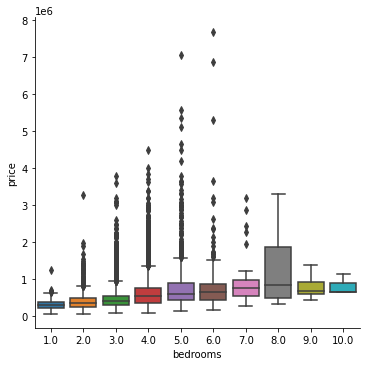

In [57]:
sns.catplot(x='bedrooms', y='price', kind='box', data=df)

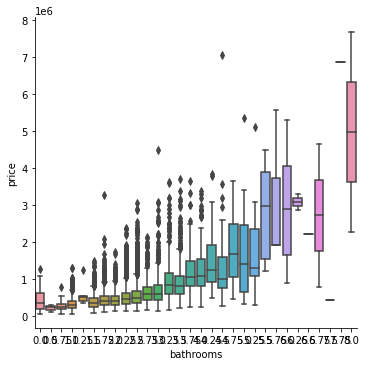

In [58]:
sns.catplot(x='bathrooms', y='price', kind='box', data=df)

In [ ]:
#bathrooms x^2

In [59]:
target = df['price']

In [60]:
features = ['bathrooms', 'bedrooms']

In [ ]:
#they will be squared in poly after test kbest drop the not squared bathroom

In [ ]:
#np.where - to feature engineer more 

In [61]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_dummy[features])
poly_data

array([[ 2.25  ,  4.    ,  5.0625,  9.    , 16.    ],
       [ 3.    ,  5.    ,  9.    , 15.    , 25.    ],
       [ 2.5   ,  4.    ,  6.25  , 10.    , 16.    ],
       ...,
       [ 1.    ,  3.    ,  1.    ,  3.    ,  9.    ],
       [ 1.5   ,  3.    ,  2.25  ,  4.5   ,  9.    ],
       [ 1.5   ,  3.    ,  2.25  ,  4.5   ,  9.    ]])

In [62]:
#see columns
poly_columns = poly.get_feature_names(features)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

,bathrooms,bedrooms,bathrooms^2,bathrooms bedrooms,bedrooms^2
0,2.25,4.0,5.0625,9.0,16.0
1,3.00,5.0,9.0000,15.0,25.0
2,2.50,4.0,6.2500,10.0,16.0
3,3.50,3.0,12.2500,10.5,9.0
4,2.50,3.0,6.2500,7.5,9.0


In [63]:
df_poly.shape

(17290, 5)

In [ ]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

In [ ]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

In [ ]:
print(y_pred = lm.predict(X_test))

print(y_pred_train = lm.predict(X_train))

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

In [ ]:
train_mae = metrics.mean_absolute_error(y_train, y_train_prediction)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_prediction)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_prediction)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))))

## Step 7: Evaluate your different models in order to determine the best model overall.

My best model was the 3rd out of five. The one under the title, "The same process with NO feature engineering - just plain features." 

## Step 8:  Refit your best model to the entire dataset.

In [ ]:
#no train test split

In [149]:
features_orig = ['sqft_living', 'sqft_lot', 'view', 'waterfront', 'condition', 'grade', 'yr_renovated',
            'yr_built', 'sqft_basement', 'sqft_above']

In [150]:
target = df['price']

In [151]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df[features_orig])
poly_data

array([[2.07000e+03, 8.89300e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.28490e+06],
       [2.90000e+03, 6.73000e+03, 0.00000e+00, ..., 1.14490e+06,
        1.95810e+06, 3.34890e+06],
       [3.77000e+03, 1.08930e+04, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.42129e+07],
       ...,
       [1.05000e+03, 9.87600e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.10250e+06],
       [1.90000e+03, 4.31860e+04, 0.00000e+00, ..., 3.60000e+05,
        7.80000e+05, 1.69000e+06],
       [1.33000e+03, 6.76800e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.76890e+06]])

In [152]:
poly_columns_orig = poly.get_feature_names(features_orig)

In [153]:
df_poly_orig = pd.DataFrame(poly_data, columns=poly_columns_orig)

In [157]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm_rfe_final = LinearRegression()

#fit the linear regression to the data
lm_rfe_final = lm_rfe.fit(df_poly_orig, target)

print(lm.intercept_)
print(lm.coef_)

121504.55675274902
[ 113053.35217812   37950.61884292   63509.72044144  -25390.54315683
   49860.15637354  369503.74092845  129863.03459646   37555.44966478
  113053.35217812  130146.6524243    -2551.28615962  127436.62453319
   37950.61884292    1016.17433105 -101012.97669184   63509.72044144
    2079.02439315    9687.63697671  -25390.54315683    5149.12404054
  111694.40386788   49860.15637354    5280.03157325  148671.11091072
  369503.74092845   -1036.15271587  168861.24027692  523928.05802126
    1043.5492481    -2320.90497631]


## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [160]:
import pickle

pickle_out = open("model.pickle","wb")
pickle.dump(lm_rfe_final, pickle_out)
pickle_out.close()

In [162]:
type(lm_rfe_final)

sklearn.linear_model._base.LinearRegression

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df[features_orig])
poly_data

In [164]:
feature_out = open("feature.pickle", "wb")
pickle.dump(poly, feature_out)
feature_out.close()

# Another predict holdout

In [45]:
# list(X_train.columns)

In [46]:
# from sklearn import linear_model

# #instantiate a linear regression object
# another_final = linear_model.LinearRegression()

# #fit the linear regression to the data
# another_final = lm.fit(X_train, y_train)


# print(lm.intercept_)
# print(lm.coef_)

No grade 3 was used, make sure to take out grade 3 because I'm putting it back in. 

In [42]:
import pickle

pickle_out = open("model.pickle","wb")
pickle.dump(another_final, pickle_out)
pickle_out.close()

In [43]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_dummy[features])
poly_data

array([[2.07000e+03, 8.89300e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.28490e+06],
       [2.90000e+03, 6.73000e+03, 0.00000e+00, ..., 1.14490e+06,
        1.95810e+06, 3.34890e+06],
       [3.77000e+03, 1.08930e+04, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.42129e+07],
       ...,
       [1.05000e+03, 9.87600e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.10250e+06],
       [1.90000e+03, 4.31860e+04, 0.00000e+00, ..., 3.60000e+05,
        7.80000e+05, 1.69000e+06],
       [1.33000e+03, 6.76800e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.76890e+06]])

In [44]:
feature_out = open("feature.pickle", "wb")
pickle.dump(poly, feature_out)
feature_out.close()